In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,cross_validate

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('../data/premiums_young_with_gr.xlsx')
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


In [3]:
df.shape

(20096, 14)

In [4]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

Here we replace all the spaces into '_' and make all the col names in small or lower case

In [6]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [7]:
# Let see the persentage of missing data

df.isna().sum()/df.count()*100

age                      0.000000
gender                   0.000000
region                   0.000000
marital_status           0.000000
number_of_dependants     0.000000
bmi_category             0.000000
smoking_status           0.009953
employment_status        0.004976
income_level             0.019908
income_lakhs             0.000000
medical_history          0.000000
insurance_plan           0.000000
annual_premium_amount    0.000000
genetical_risk           0.000000
dtype: float64

as we can notice the percentage is very low we can drop those missing records

In [8]:
df.dropna(how='any',inplace=True)
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [11]:
df[df['number_of_dependants']<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
150,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309,2
871,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095,0
906,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641,1
2462,20,Male,Northeast,Unmarried,-3,Underweight,Regular,Freelancer,10L - 25L,20,Diabetes,Silver,9640,1
3059,20,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Salaried,> 40L,77,No Disease,Silver,9299,2
3120,25,Male,Northwest,Unmarried,-1,Underweight,No Smoking,Salaried,10L - 25L,13,No Disease,Bronze,7234,3
3780,23,Female,Southeast,Unmarried,-3,Normal,Regular,Freelancer,25L - 40L,40,No Disease,Bronze,5003,0
5593,25,Male,Northwest,Unmarried,-1,Normal,No Smoking,Salaried,10L - 25L,20,No Disease,Bronze,6299,2
7585,22,Male,Northwest,Unmarried,-3,Normal,Occasional,Self-Employed,<10L,8,No Disease,Gold,13596,2
9765,18,Female,Southeast,Unmarried,-1,Underweight,No Smoking,Self-Employed,<10L,4,No Disease,Bronze,9366,5


In [12]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [13]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20090 entries, 0 to 20095
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    20090 non-null  int64 
 1   gender                 20090 non-null  object
 2   region                 20090 non-null  object
 3   marital_status         20090 non-null  object
 4   number_of_dependants   20090 non-null  int64 
 5   bmi_category           20090 non-null  object
 6   smoking_status         20090 non-null  object
 7   employment_status      20090 non-null  object
 8   income_level           20090 non-null  object
 9   income_lakhs           20090 non-null  int64 
 10  medical_history        20090 non-null  object
 11  insurance_plan         20090 non-null  object
 12  annual_premium_amount  20090 non-null  int64 
 13  genetical_risk         20090 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.3+ MB


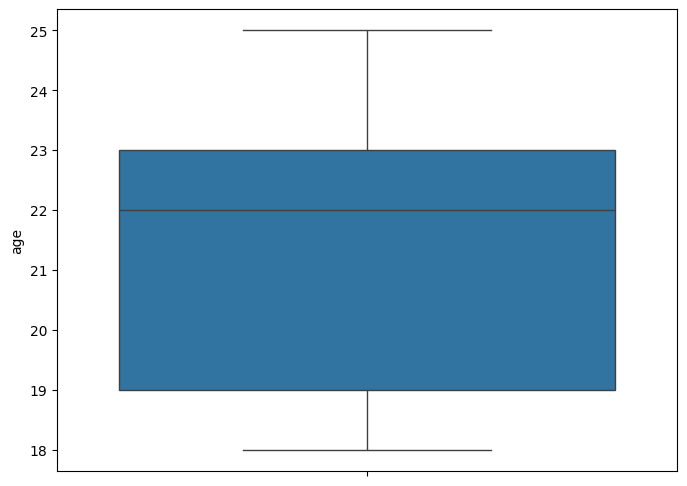

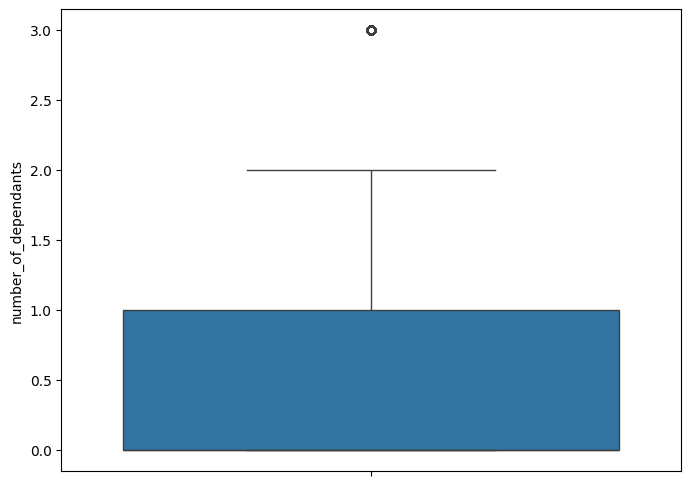

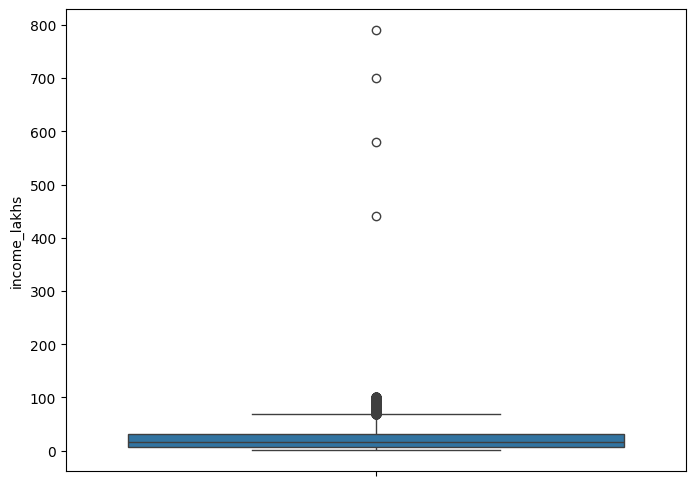

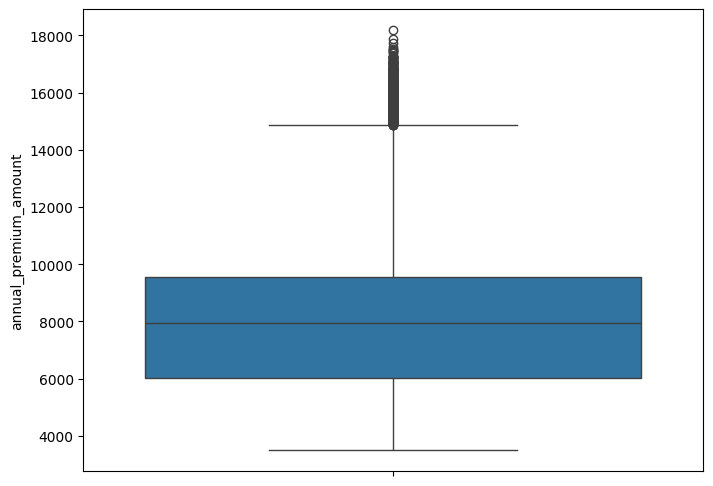

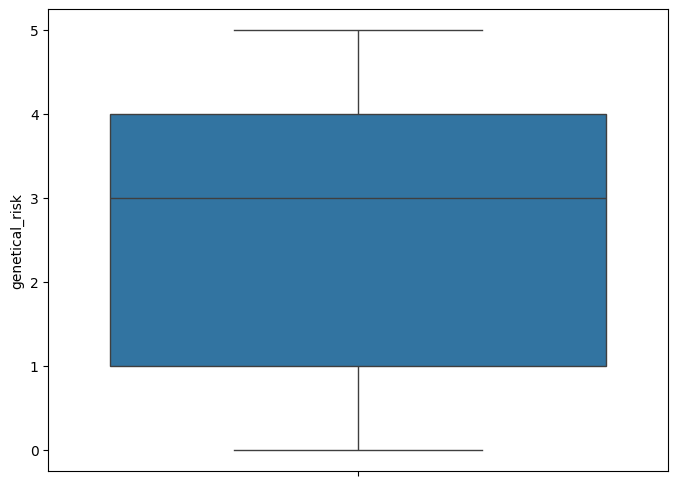

In [15]:
for i in df.columns:
    if df[i].dtype != 'object':
        plt.figure(figsize=(8,6))
        sns.boxplot(df[i])

In [16]:
num_feature = df.select_dtypes(exclude='object').columns
num_feature

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

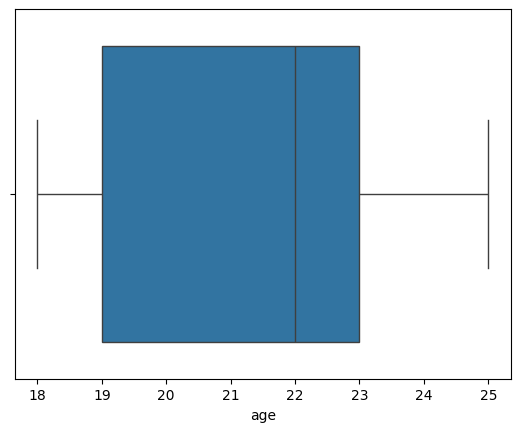

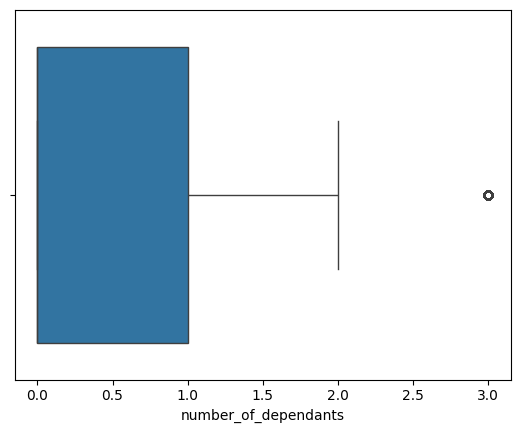

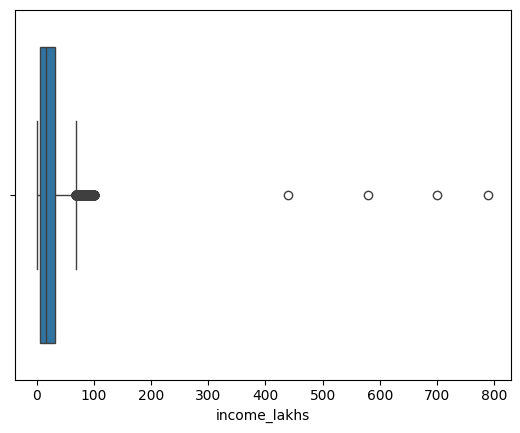

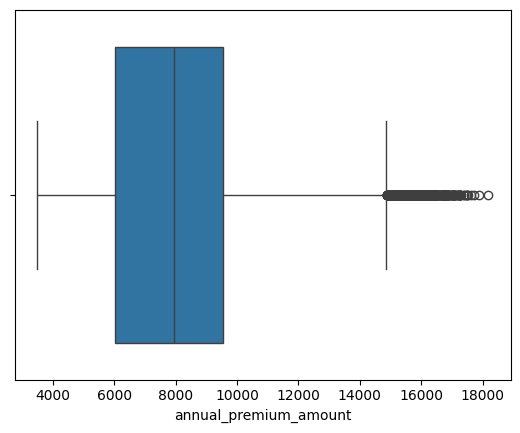

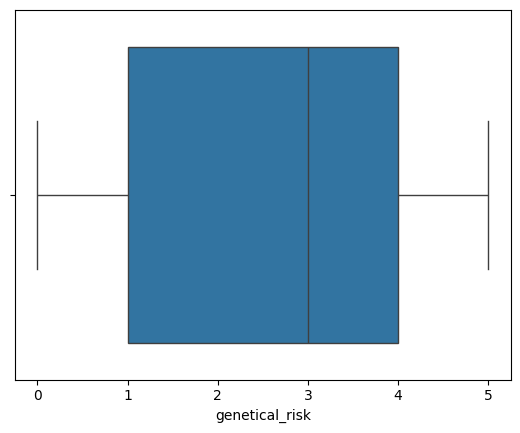

In [17]:
for i in num_feature:
    sns.boxplot(x=df[i])
    plt.show()

In [18]:
# outlier tretment for age

df[df['age']>100]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk


In [19]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

as we know it is highly unlikly to have age of a person will be around this [224, 124, 136, 203, 356] list so we are droping those records

In [20]:
df1 = df[df['age']<100].copy()
df1['age'].describe()

count    20090.000000
mean        21.494375
std          2.294052
min         18.000000
25%         19.000000
50%         22.000000
75%         23.000000
max         25.000000
Name: age, dtype: float64

<Axes: xlabel='income_lakhs', ylabel='Count'>

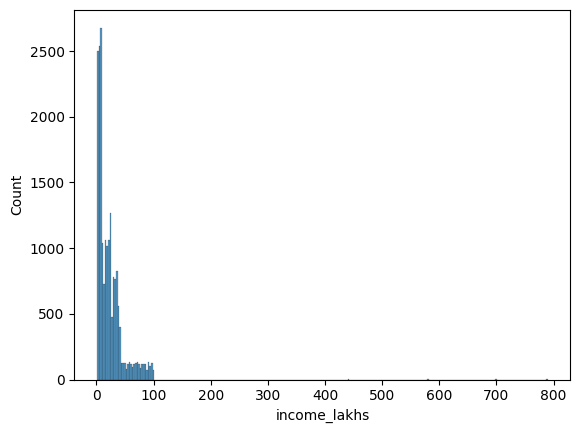

In [21]:
sns.histplot(df1['income_lakhs'])

In [22]:
def get_outliers(col):
    q1,q3 = col.quantile([0.25,0.95])
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr 
    return upper,lower

In [23]:
upper,lower = get_outliers(df1['income_lakhs'])

In [24]:
print(upper,lower)

178.5 -97.5


In [25]:
df1[df1['income_lakhs']>upper].shape

(4, 14)

In [26]:
df2 = df1[df1['income_lakhs']<upper]

In [27]:
df2['income_lakhs'].describe()

count    20086.000000
mean        22.390371
std         21.732062
min          1.000000
25%          6.000000
50%         16.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

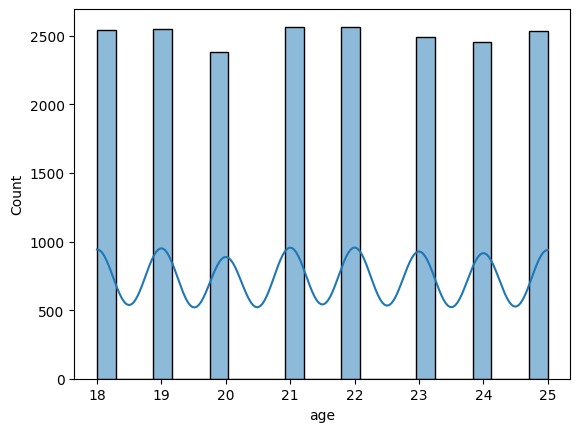

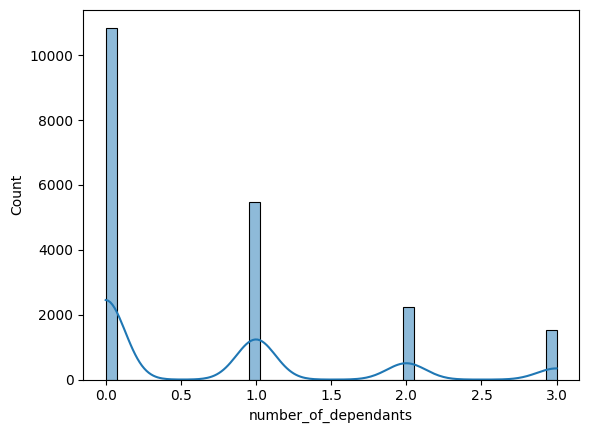

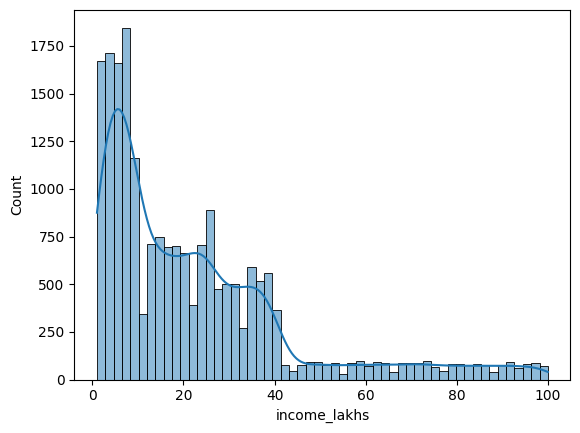

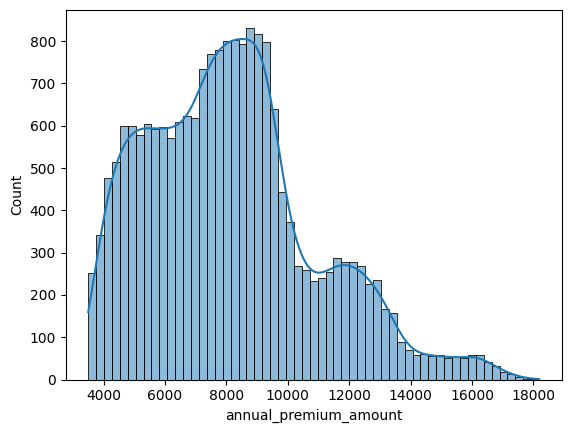

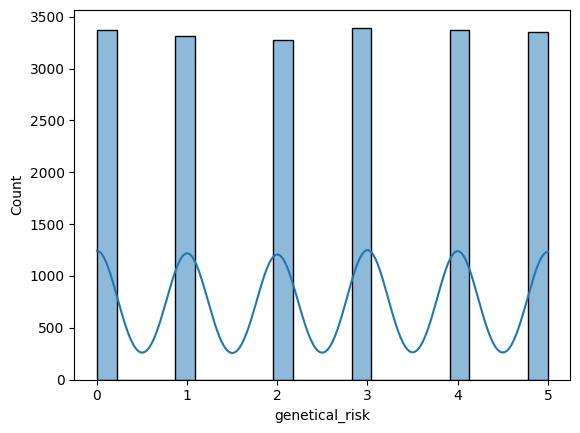

In [28]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.histplot(df2[i],kde=True)
        plt.show()

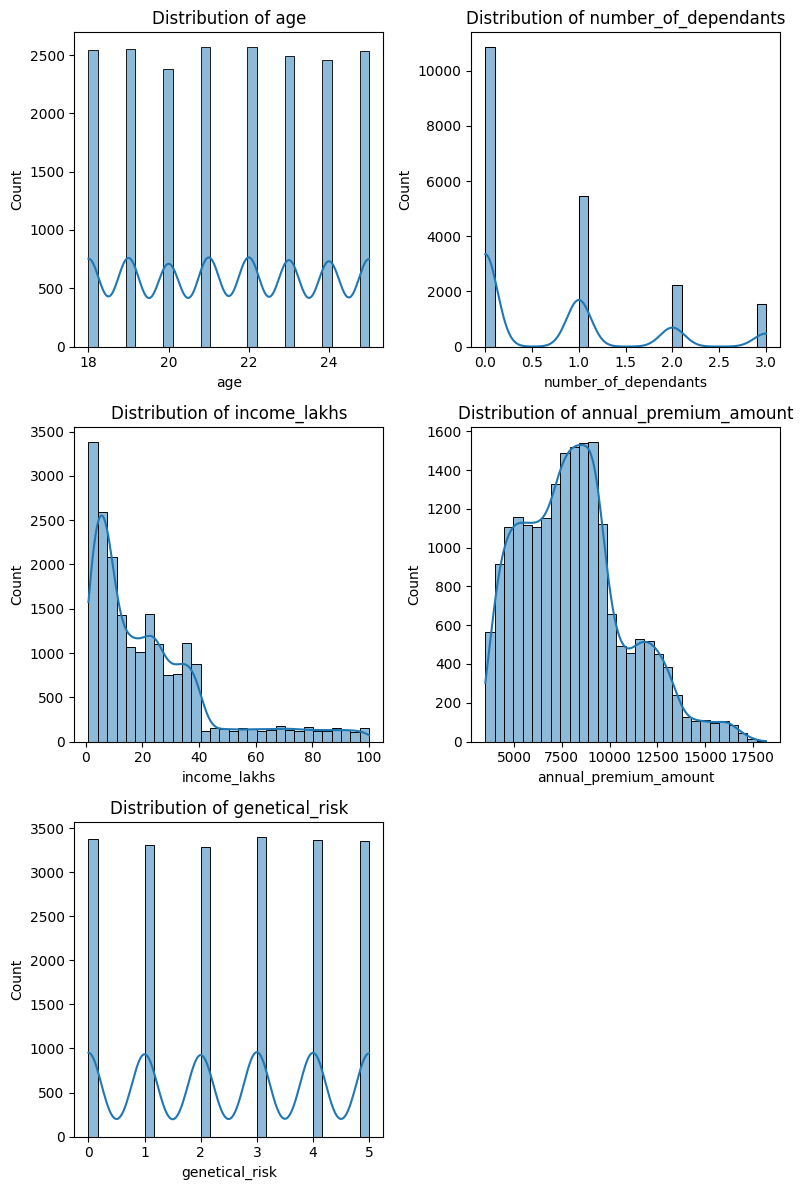

In [29]:
# Select numeric columns
num_cols = [col for col in df2.columns if df2[col].dtype != 'object']

# Define number of columns per row
n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(8, 4 * n_rows))

for idx, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(df2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

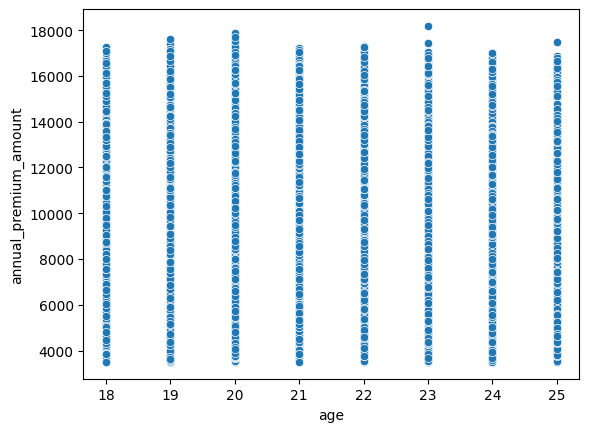

In [30]:
sns.scatterplot(df2,x='age',y='annual_premium_amount')

<Axes: xlabel='age', ylabel='income_lakhs'>

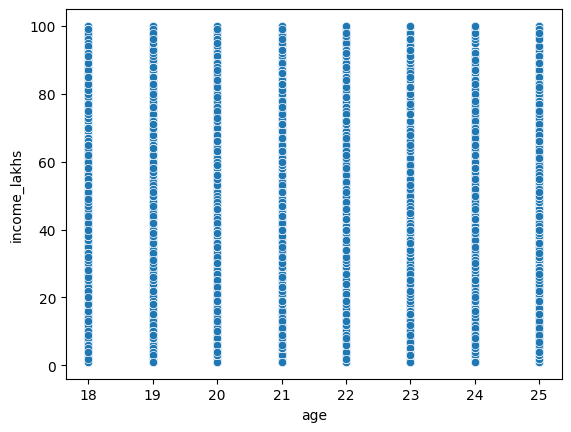

In [31]:
sns.scatterplot(df2,x='age',y='income_lakhs')

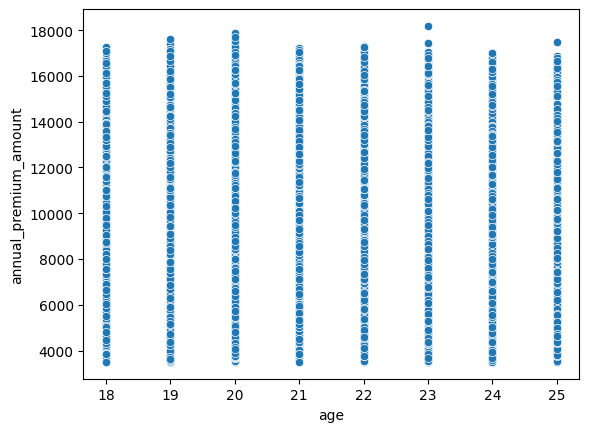

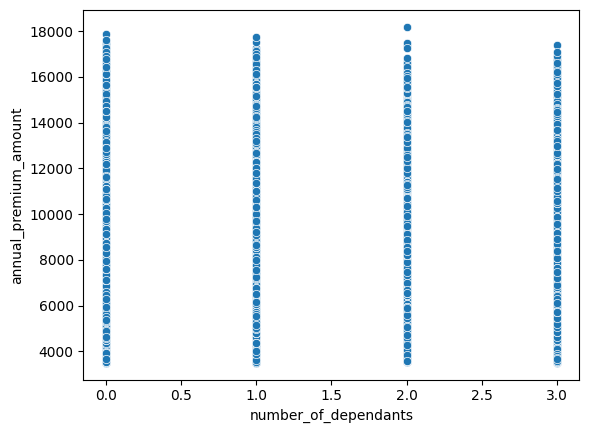

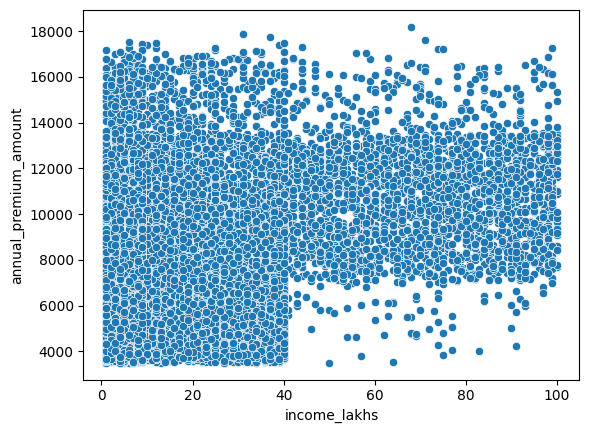

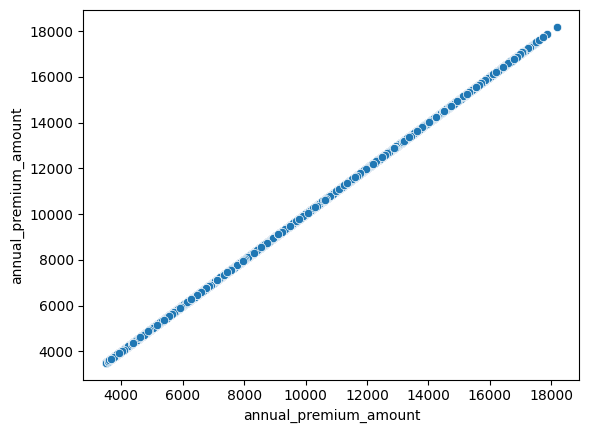

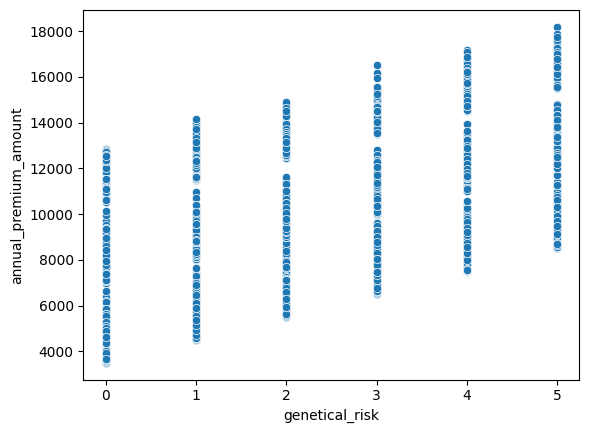

In [32]:
for i in df2.columns:
    if df2[i].dtype != 'object':
        sns.scatterplot(df2,x=i,y='annual_premium_amount')
        plt.show()

In [33]:
cat_features = df2.select_dtypes(include='object').columns
for i in cat_features:
    print(i, ":",df2[i].unique())

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [34]:
df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
},inplace=True)

In [35]:
df2['smoking_status'].unique()

array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

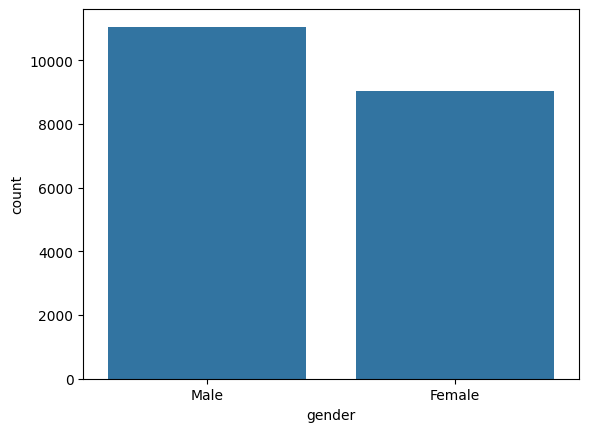

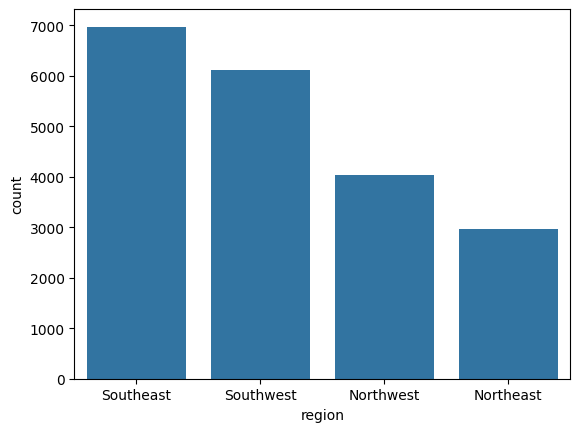

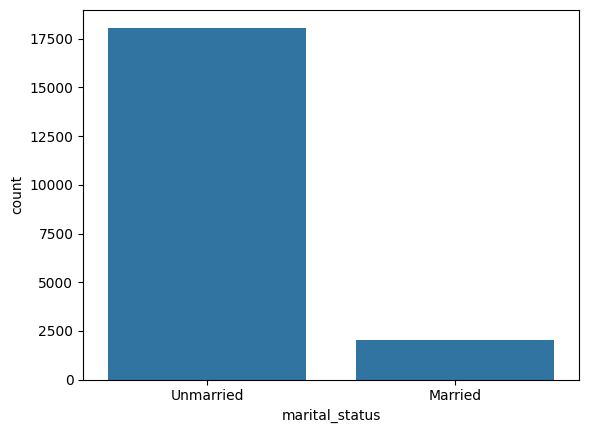

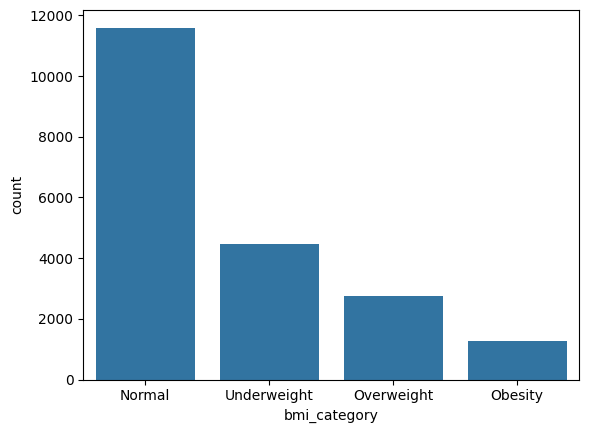

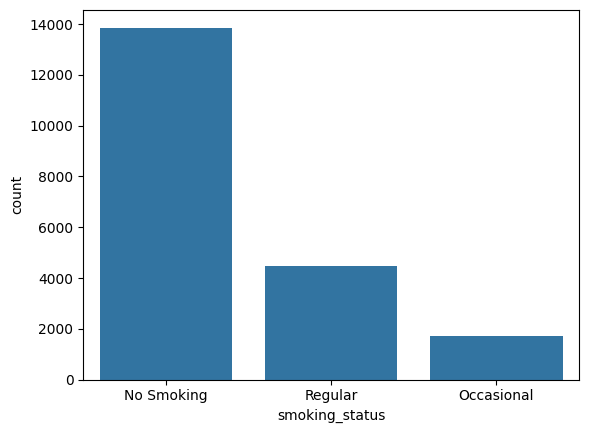

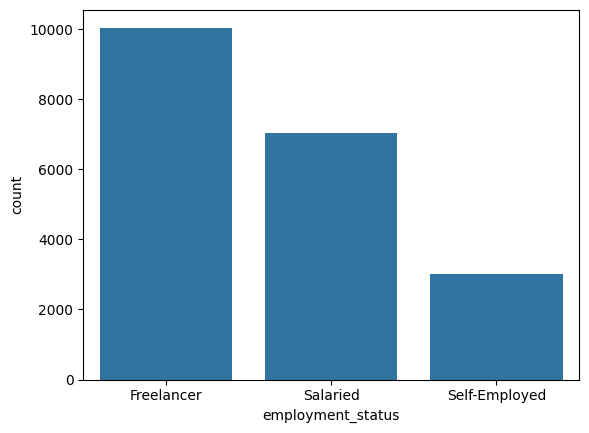

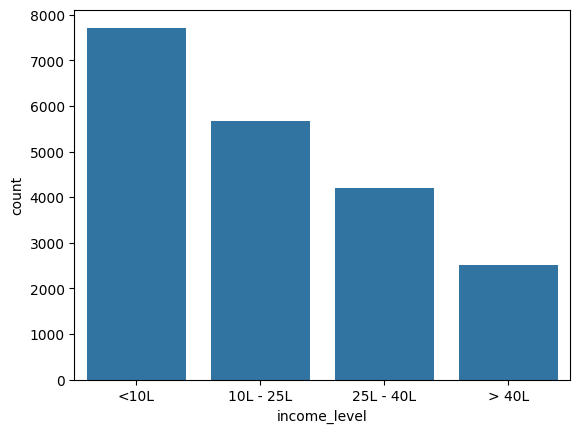

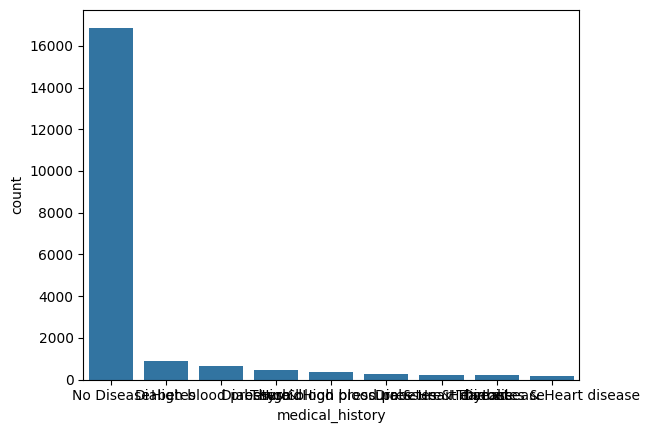

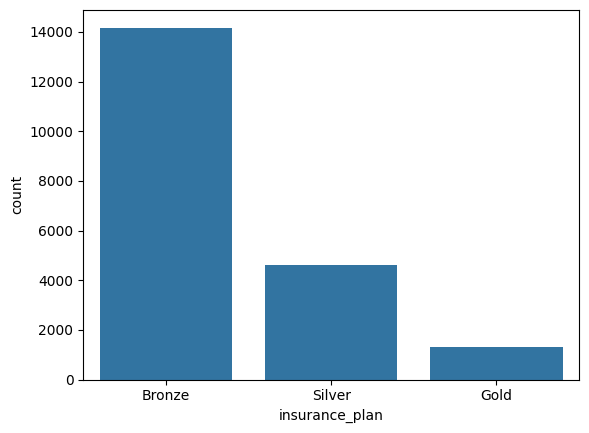

In [36]:
for i in cat_features:
    sns.barplot(df2[i].value_counts())
    plt.show()

In [37]:
for i in cat_features:
    print(df2[i].value_counts(normalize=True))

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64
region
Southeast    0.346958
Southwest    0.304590
Northwest    0.201284
Northeast    0.147167
Name: proportion, dtype: float64
marital_status
Unmarried    0.899881
Married      0.100119
Name: proportion, dtype: float64
bmi_category
Normal         0.577467
Underweight    0.222493
Overweight     0.136513
Obesity        0.063527
Name: proportion, dtype: float64
smoking_status
No Smoking    0.690033
Regular       0.223589
Occasional    0.086379
Name: proportion, dtype: float64
employment_status
Freelancer       0.500000
Salaried         0.350045
Self-Employed    0.149955
Name: proportion, dtype: float64
income_level
<10L         0.384397
10L - 25L    0.281888
25L - 40L    0.209051
> 40L        0.124664
Name: proportion, dtype: float64
medical_history
No Disease                             0.840038
Diabetes                               0.044260
High blood pressure                    0.031315
Thyroid             

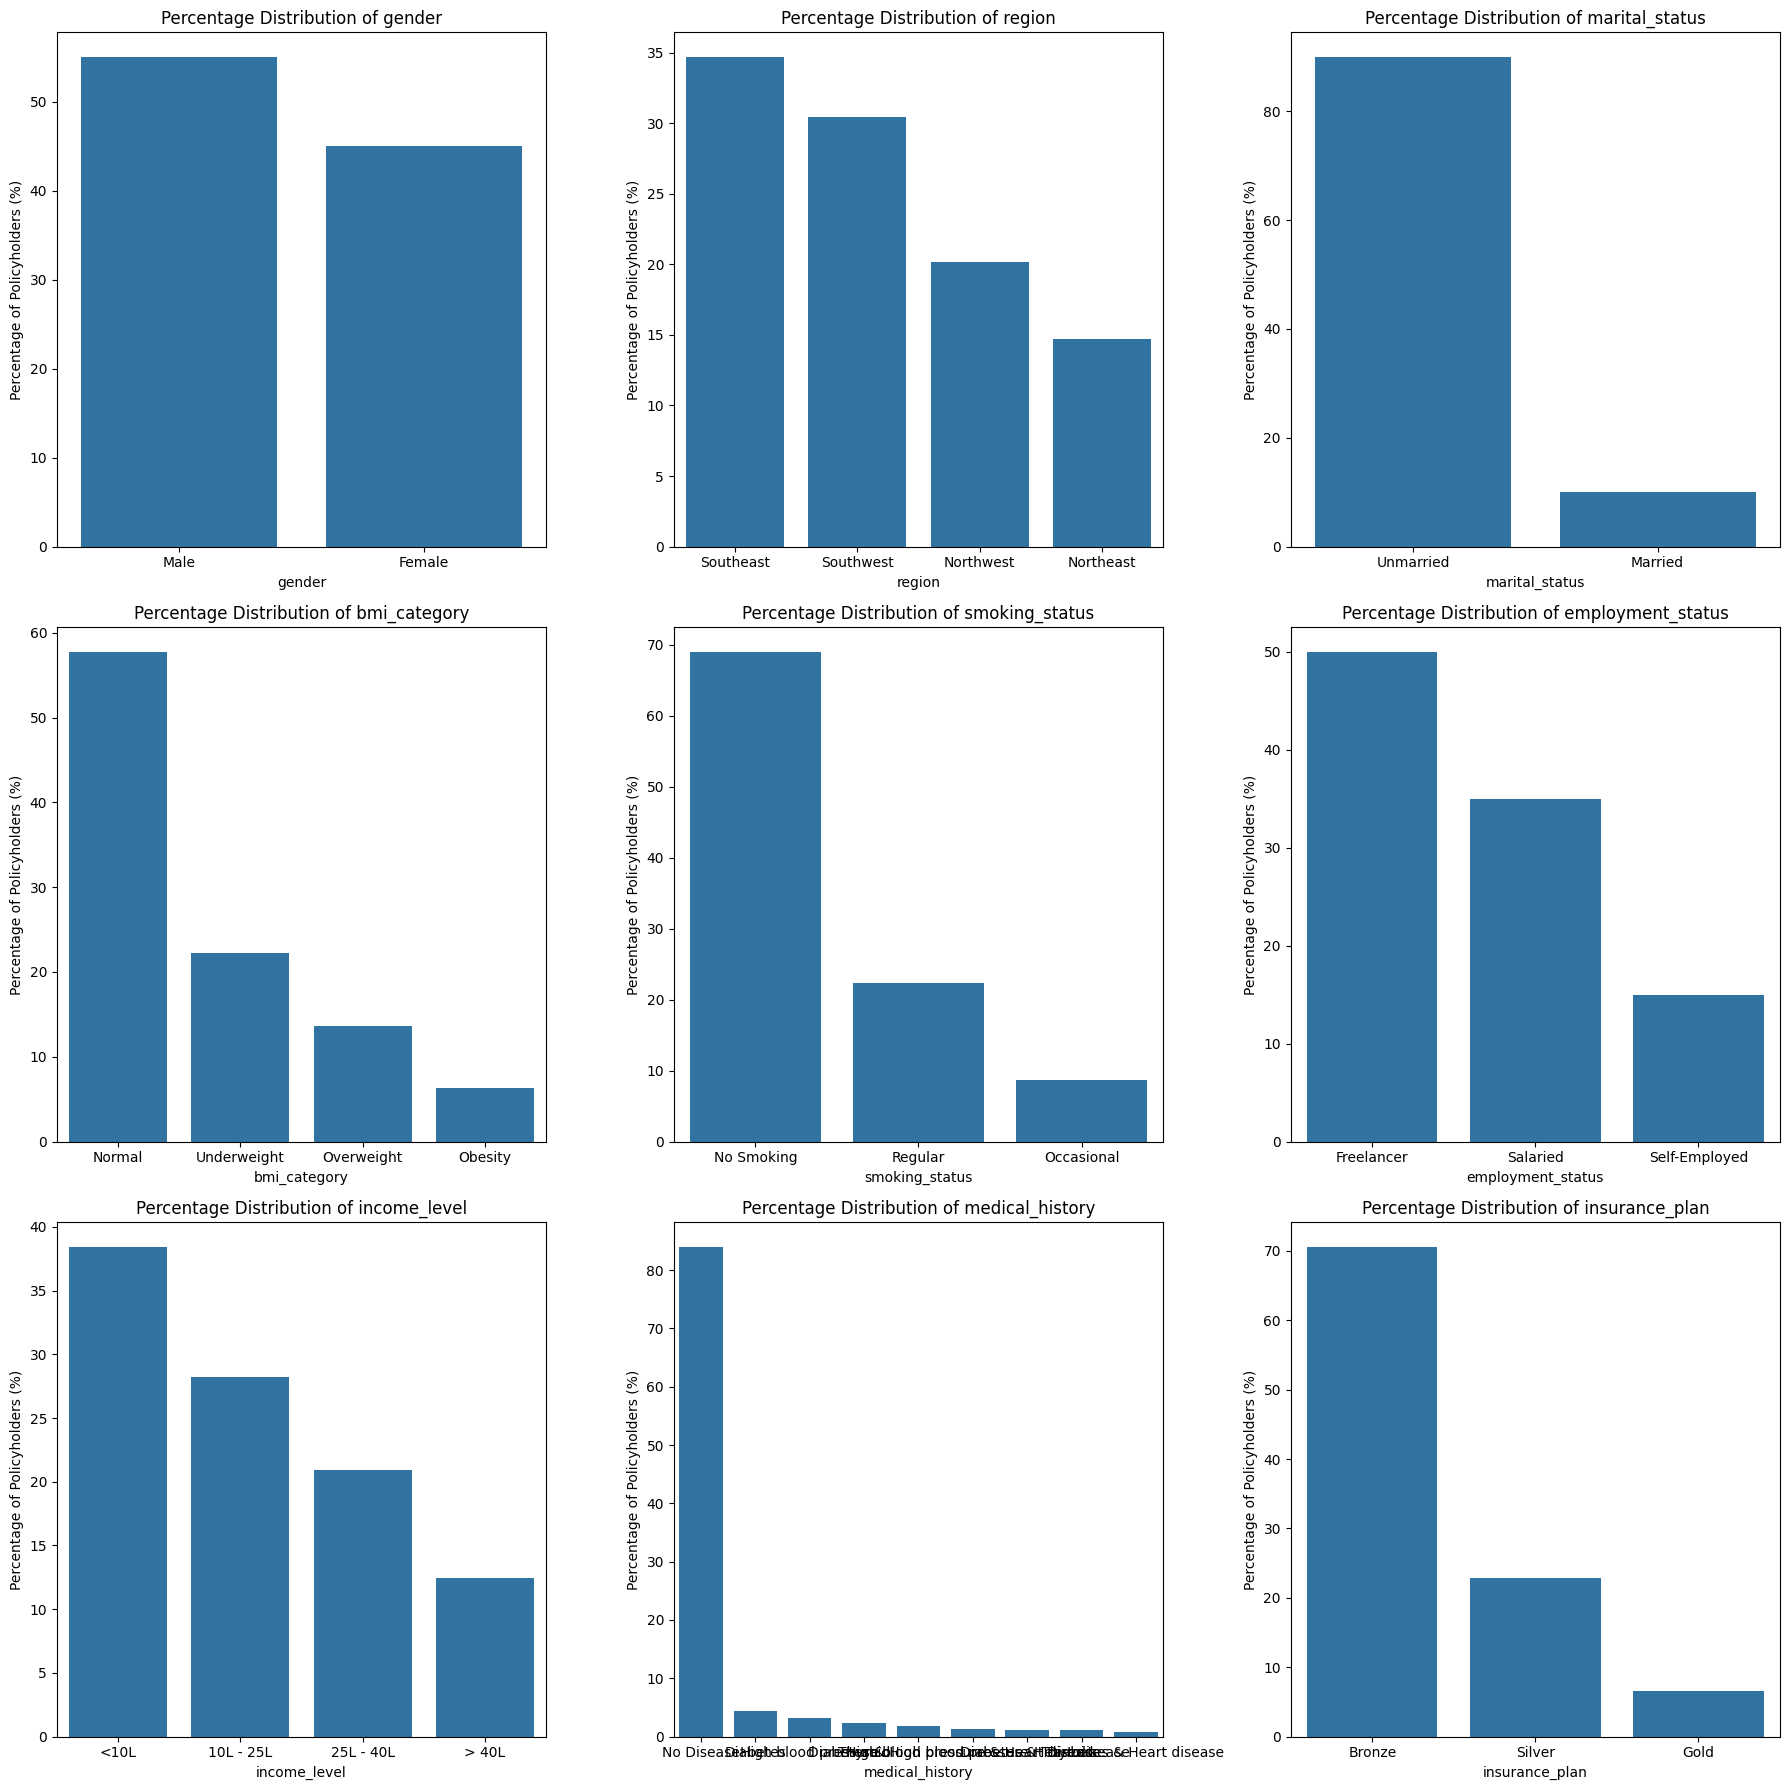

In [38]:
fig,axes = plt.subplots(3,3,figsize=(18,18))
axes = axes.flatten()

for ax,col in zip(axes,cat_features):
    cat_count = df2[col].value_counts(normalize=True)*100
    
    sns.barplot(x=cat_count.index,y=cat_count.values,ax=ax)
    ax.set_title(f'Percentage Distribution of {col}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.set_xlabel(col)
    
plt.tight_layout()
plt.show()

In [39]:
tab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
tab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


<Axes: xlabel='income_level'>

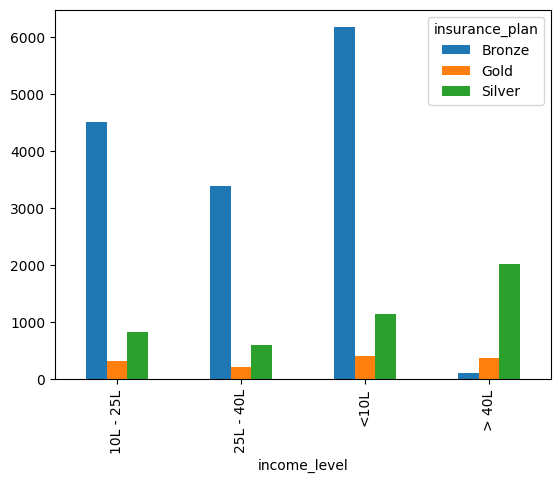

In [40]:
tab.plot(kind='bar')

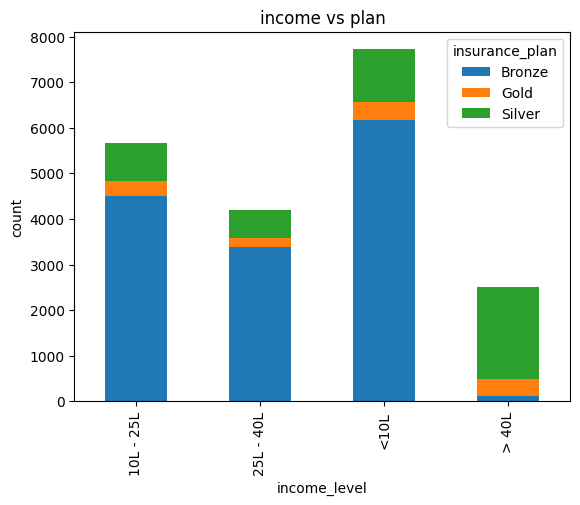

In [41]:
tab.plot(kind='bar',stacked=True)
plt.title('income vs plan')
plt.ylabel('count')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

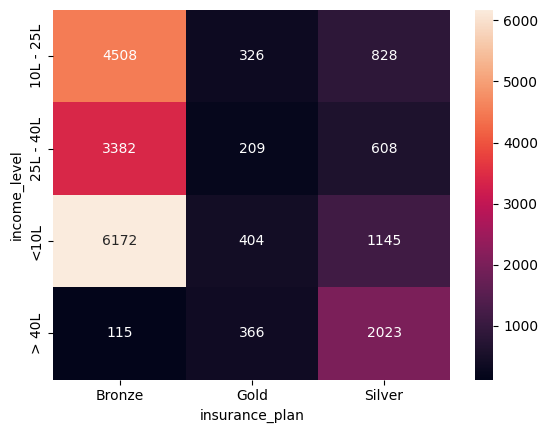

In [42]:
sns.heatmap(tab,annot=True,fmt='d')

In [43]:
df2['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [44]:
# as per business we have a risk score

risk_score ={
    'diabetes':6,
    'heart disease':8,
    'high blood pressure':6,
    'thyroid':5,
    'no disease':0,
    'none':0
}

In [45]:
df2[['disease1','disease2']] = df2['medical_history'].str.split(' & ',expand=True).apply(lambda x: x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,None


In [46]:
df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)

In [47]:
df2['total_risk_score'] = 0

for x in ['disease1','disease2']:
    df2['total_risk_score'] += df2[x].map(risk_score)

# Normalised the total_risk

max_score = df2['total_risk_score'].max() 
min_score = df2['total_risk_score'].min()
df2['normalised_risk_score'] = (df2['total_risk_score'] - min_score)/(max_score-min_score)

df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000


In [48]:
df2['insurance_plan'].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [49]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1,'Silver':2,'Gold':3})
df2['insurance_plan'].unique()

array([2, 1, 3])

In [50]:
df2['income_level'].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [51]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalised_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,no disease,none,0,0.000000


In [52]:
df2['income_level'].unique()

array([4, 1, 2, 3])

In [53]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk', 'disease1', 'disease2',
       'total_risk_score', 'normalised_risk_score'],
      dtype='object')

In [54]:
# drop redandant col

df2.drop(columns=['medical_history','disease1', 'disease2', 'total_risk_score'],axis=1,inplace=True)

In [55]:
noninal_col = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status', 'employment_status']

df2_encode = pd.get_dummies(df2,columns=noninal_col,drop_first=True,dtype=int)
df2_encode.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


<Axes: >

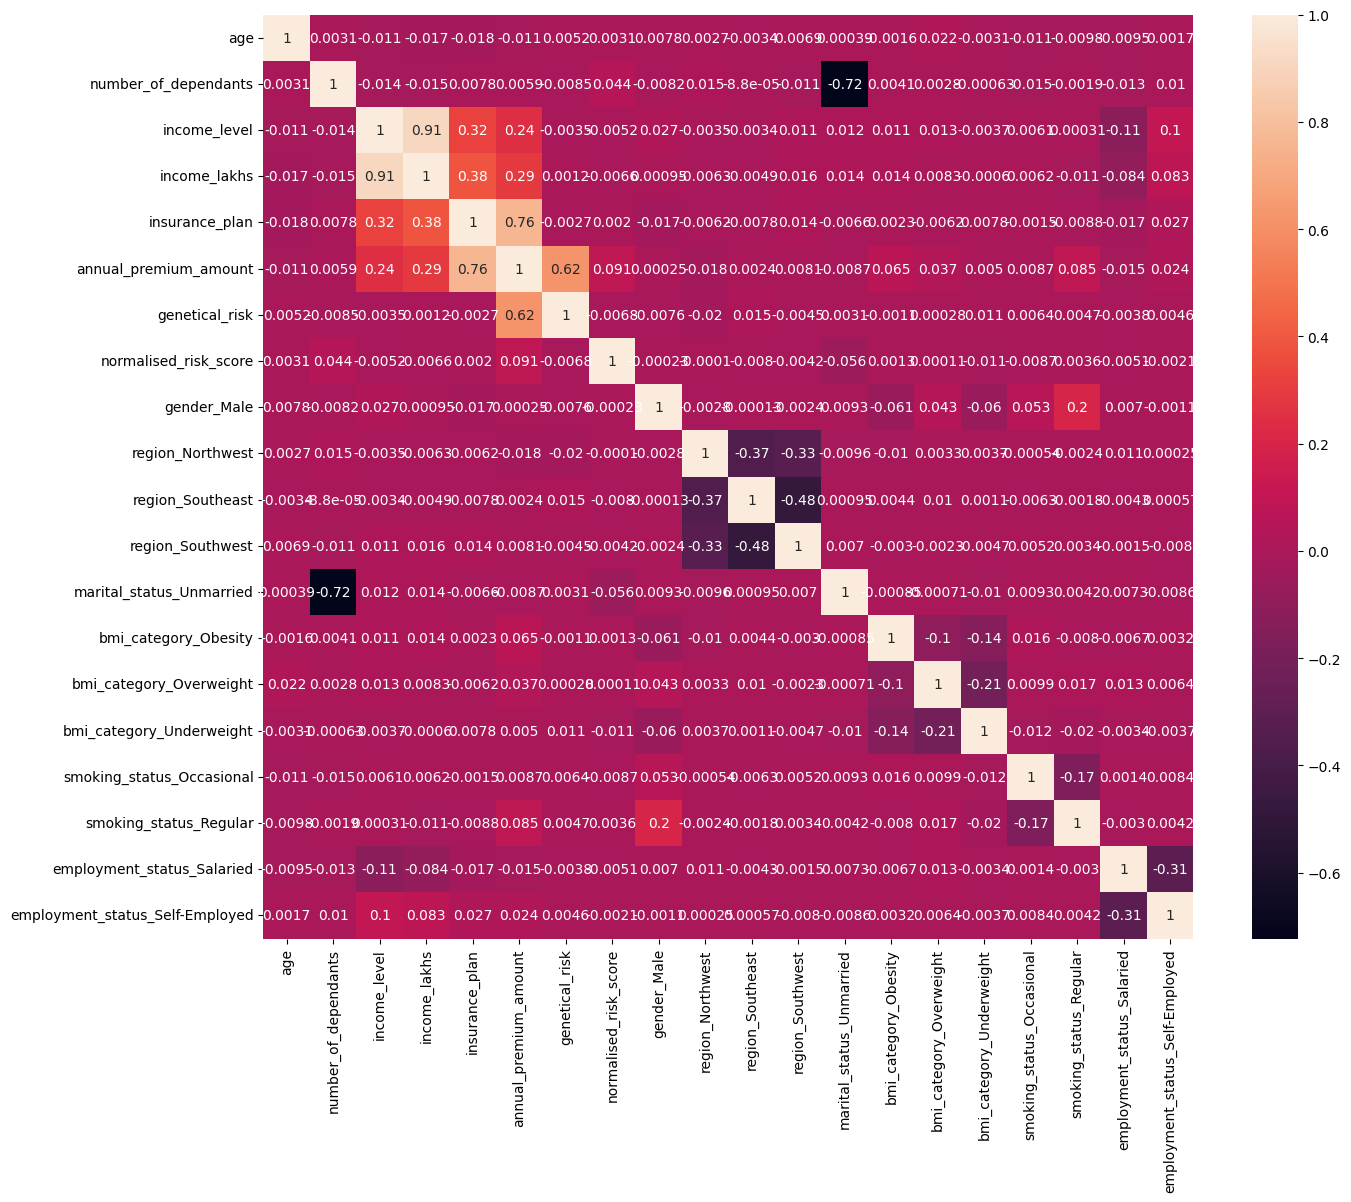

In [56]:
cor = df2_encode.corr()
plt.figure(figsize=(15,12))
sns.heatmap(cor,annot=True)

In [57]:
df2_encode.head(2)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0


In [94]:
x = df2_encode.drop('annual_premium_amount',axis=1)
y = df2_encode['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

col_to_scale = ['age','number_of_dependants','income_level','income_lakhs','insurance_plan','genetical_risk']
scale = MinMaxScaler()

x[col_to_scale] = scale.fit_transform(x[col_to_scale])
x.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [95]:
x.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
def cal_vif(data):
    vif_df = pd.DataFrame()
    vif_df['column'] = data.columns
    vif_df['vif'] = [variance_inflation_factor (data.values,i) for i in range(data.shape[1])]
    return vif_df

In [97]:
cal_vif(x)

,column,vif
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,normalised_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [98]:
cal_vif(x.drop('income_level',axis=1))

,column,vif
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,normalised_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [99]:
x_redused = x.drop('income_level',axis=1)
x_redused.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x_redused,y,test_size=0.3,random_state=42)

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (14060, 18)
x_test (6026, 18)
y_train (14060,)
y_test (6026,)


In [101]:
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_test = model_lr.predict(x_test)
y_pred_train = model_lr.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.9883651898128658
Test Accuracy 0.9880477016267948


In [102]:
model_lr.coef_

array([-1.05801891e-01,  2.01069306e+01, -1.18192939e+01,  6.99564576e+03,
        4.98367534e+03,  1.13118985e+03,  6.08209851e+00,  1.91642829e+00,
        2.07974087e+00,  8.29849020e+00,  1.42155309e+01,  8.01977884e+02,
        4.04437286e+02,  1.13743592e+02,  2.07656492e+02,  6.07368444e+02,
        7.08985789e+00,  9.30425482e+00])

In [103]:
model_lr.intercept_

np.float64(3973.485873613312)

In [104]:
feature_imp = model_lr.coef_

cof_df = pd.DataFrame(feature_imp,index=x_test.columns,columns=['coefficents'])
cof_df = cof_df.sort_values(by='coefficents',ascending=False)
cof_df

,coefficents
insurance_plan,6995.645756
genetical_risk,4983.675336
normalised_risk_score,1131.189849
bmi_category_Obesity,801.977884
smoking_status_Regular,607.368444
bmi_category_Overweight,404.437286
smoking_status_Occasional,207.656492
bmi_category_Underweight,113.743592
number_of_dependants,20.106931
marital_status_Unmarried,14.215531


<Axes: xlabel='coefficents', ylabel='None'>

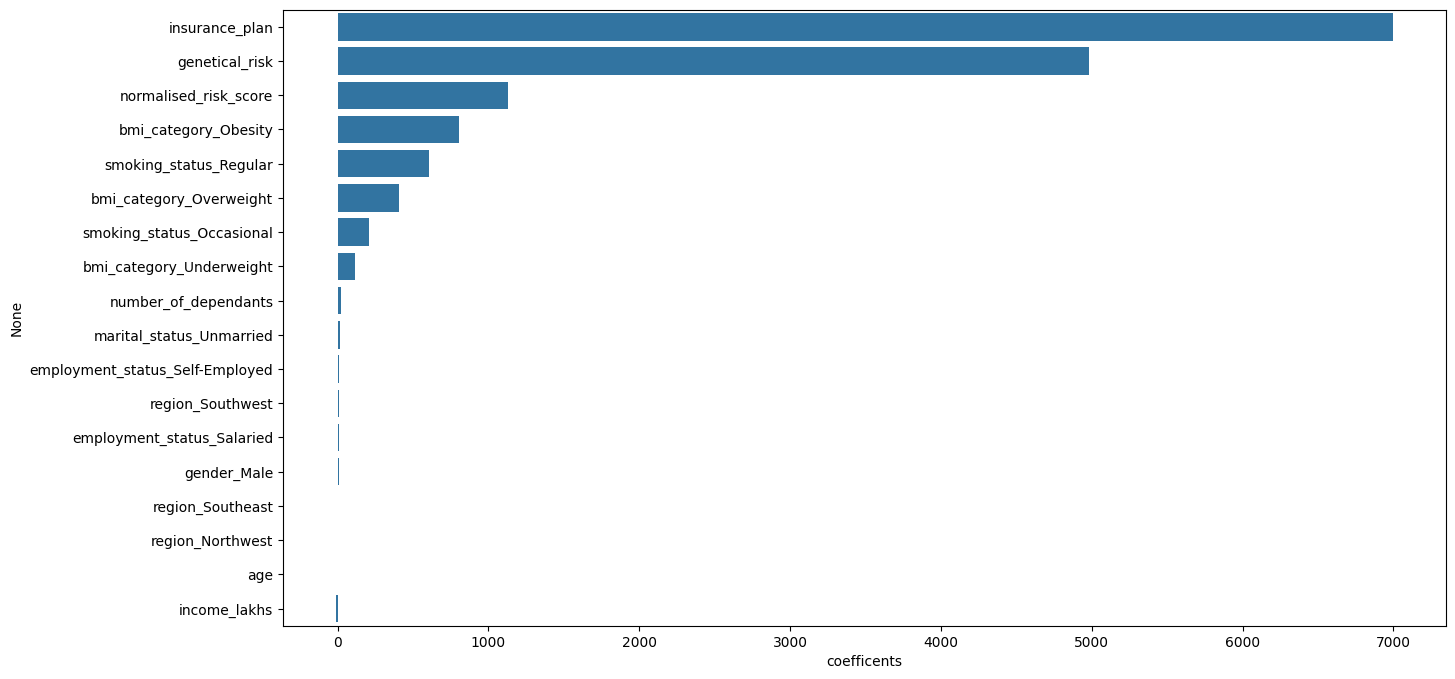

In [105]:
plt.figure(figsize=(15,8))
sns.barplot(cof_df,x=cof_df['coefficents'],y=cof_df.index)


In [106]:
model_rg = Ridge()
model_rg.fit(x_train,y_train)
y_pred_test = model_rg.predict(x_test)
y_pred_train = model_rg.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.9883476262457033
Test Accuracy 0.9880257248047868


In [107]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

r2_test = r2_score(y_pred_test,y_test)
r2_train = r2_score(y_pred_train,y_train)

print(f'Train Accuracy {r2_train}')
print(f'Test Accuracy {r2_test}')

Train Accuracy 0.9925539493560791
Test Accuracy 0.9872051477432251


In [108]:
params_grid ={
    'n_estimators':[20,40,50],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5]
}

random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=params_grid,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    random_state=42
)
random_cv.fit(x_train,y_train)
random_cv.best_score_

np.float64(0.9881282448768616)

In [109]:
best_model = random_cv.best_estimator_

In [110]:
random_cv.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

<Axes: xlabel='coefficents', ylabel='None'>

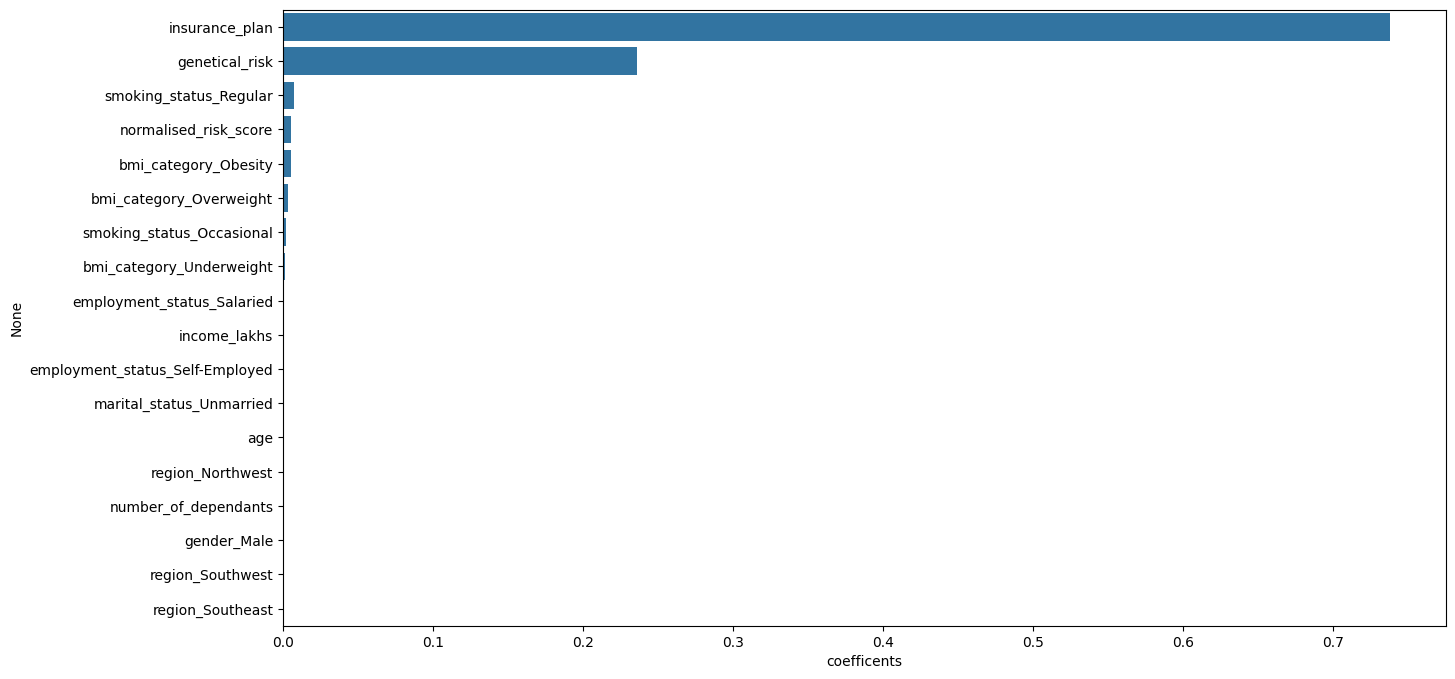

In [111]:
feature_imp = best_model.feature_importances_

cof_df = pd.DataFrame(feature_imp,index=x_test.columns,columns=['coefficents'])
cof_df = cof_df.sort_values(by='coefficents',ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(cof_df,x=cof_df['coefficents'],y=cof_df.index)

## Error Analysis

In [112]:
y_pred = best_model.predict(x_test)

residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

result_df = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})

result_df.head() 

,actual,predicted,diff,diff_pct
10489,5452,5459.750000,7.750000,0.142150
7989,9658,9034.060547,-623.939453,-6.460338
3113,6031,5777.926270,-253.073730,-4.196215
10605,12386,12143.197266,-242.802734,-1.960300
4204,4245,4701.327637,456.327637,10.749768


<Axes: xlabel='diff_pct', ylabel='Count'>

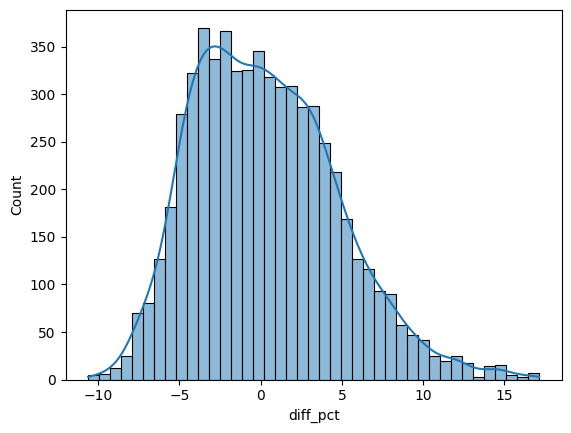

In [113]:
sns.histplot(result_df['diff_pct'],kde=True)

In [114]:
error_threshold = 10
error_df = result_df[np.abs(result_df['diff_pct']>error_threshold)]
error_df.shape

(150, 4)

In [115]:
result_df.shape

(6026, 4)

In [116]:
# percentage of extrime error

extreme_error_pct = error_df.shape[0]*100/result_df.shape[0]
extreme_error_pct

2.489213408562894

In [117]:
result_df[np.abs(result_df['diff_pct']>50)].sort_values('diff_pct',ascending=False)

,actual,predicted,diff,diff_pct


In [118]:
x_test.index

Index([10489,  7989,  3113, 10605,  4204, 16419,  6534,  1712, 15712, 10360,
       ...
       12378,  2039,  1023,  8235, 18542, 18960,   266, 10036, 15506, 10890],
      dtype='int64', length=6026)

In [119]:
error_df.index

Index([ 4204,  8862,  3396, 13142,  7802,  9881, 19594, 18329,  6076, 18951,
       ...
        5925, 16891,  3055, 13086, 11264, 11302, 11331, 17877, 10807, 10502],
      dtype='int64', length=150)

In [120]:
x_test.loc[error_df.index]

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4204,0.000000,0.000000,0.222222,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
8862,0.714286,0.333333,0.010101,0.0,0.0,0.000000,1,0,0,0,1,0,0,0,0,1,1,0
3396,1.000000,0.000000,0.020202,0.0,0.2,0.000000,1,1,0,0,1,0,0,0,0,0,0,0
13142,0.571429,0.666667,0.070707,0.0,0.0,0.428571,0,0,0,1,0,0,0,0,1,0,1,0
7802,0.857143,1.000000,0.020202,0.0,0.0,0.357143,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11302,0.142857,0.000000,0.020202,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,0,1,0
11331,0.428571,0.000000,0.909091,0.0,0.0,0.000000,1,0,1,0,1,0,0,0,0,1,0,1
17877,0.000000,0.000000,0.030303,0.0,0.2,0.000000,1,0,0,1,1,0,0,0,0,0,1,0
10807,1.000000,0.666667,0.060606,0.0,0.0,0.428571,0,0,1,0,1,0,0,0,0,0,0,0


In [121]:
extreme_error_df = x_test.loc[error_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalised_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
4204,0.000000,0.000000,0.222222,0.0,0.0,0.000000,0,0,1,0,1,0,0,1,0,1,0,0
8862,0.714286,0.333333,0.010101,0.0,0.0,0.000000,1,0,0,0,1,0,0,0,0,1,1,0
3396,1.000000,0.000000,0.020202,0.0,0.2,0.000000,1,1,0,0,1,0,0,0,0,0,0,0
13142,0.571429,0.666667,0.070707,0.0,0.0,0.428571,0,0,0,1,0,0,0,0,1,0,1,0
7802,0.857143,1.000000,0.020202,0.0,0.0,0.357143,1,0,1,0,0,0,0,1,0,0,0,0


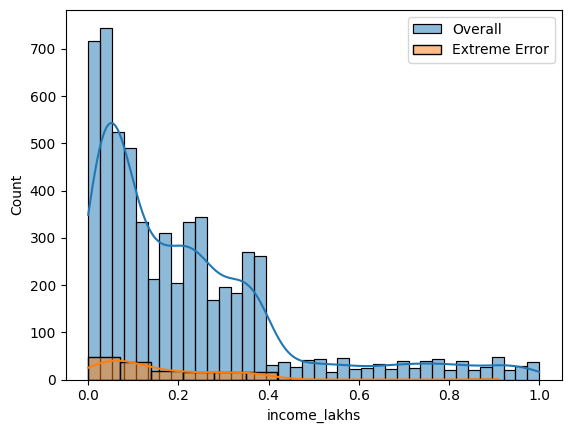

In [122]:
sns.histplot(x_test['income_lakhs'],label='Overall',kde=True)
sns.histplot(extreme_error_df['income_lakhs'],label='Extreme Error',kde=True)
plt.legend()
plt.show()

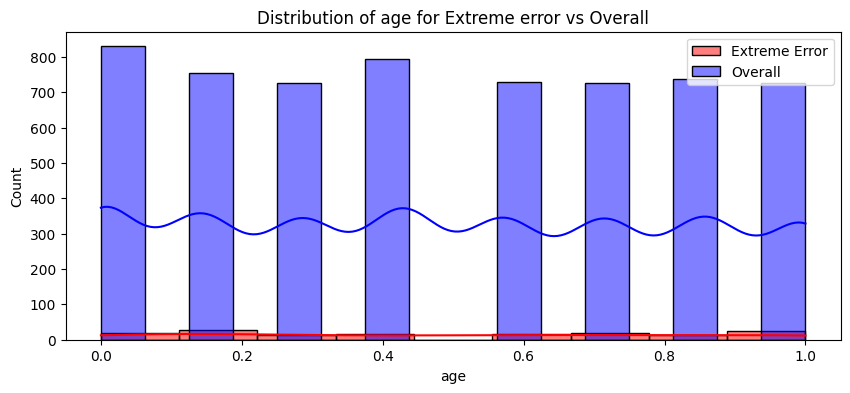

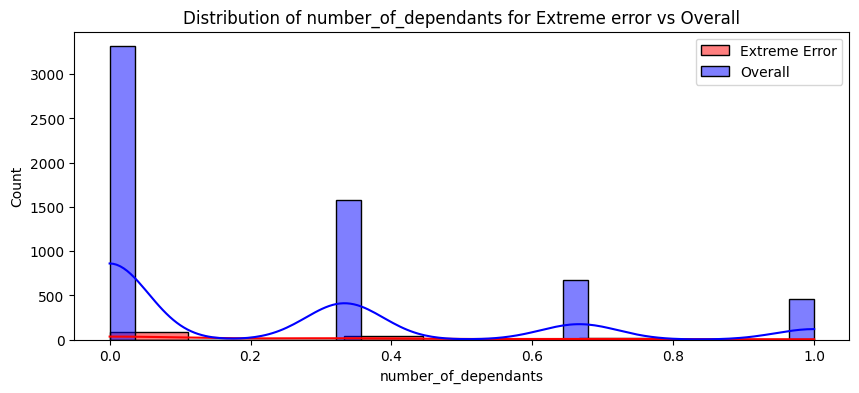

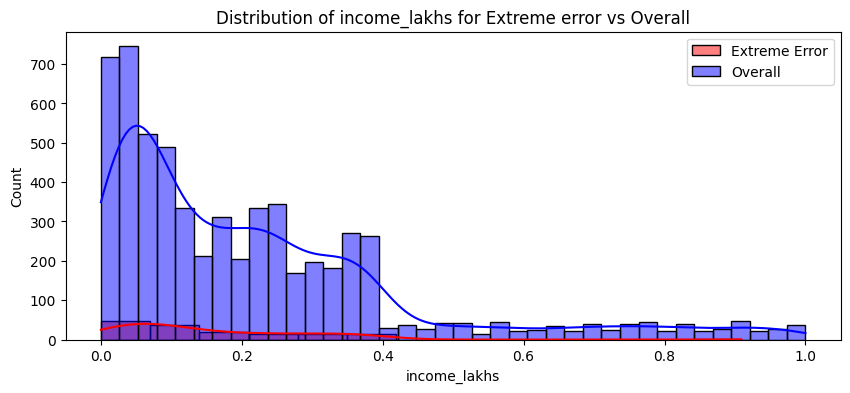

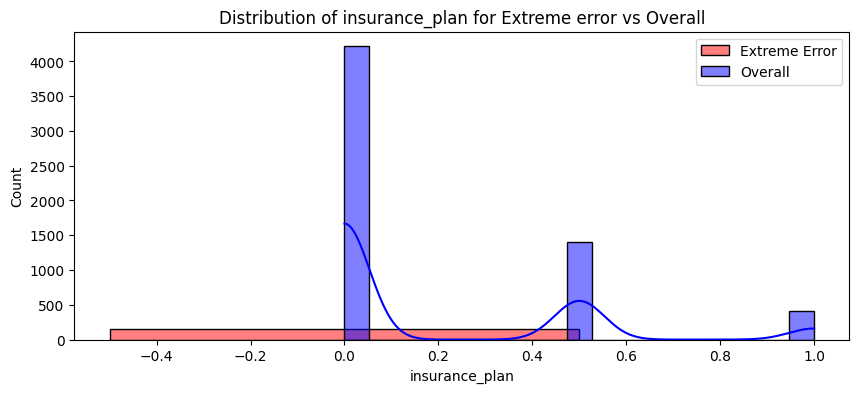

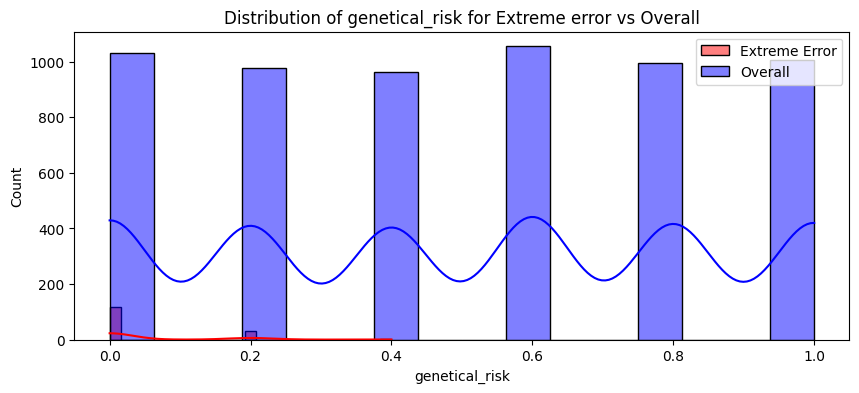

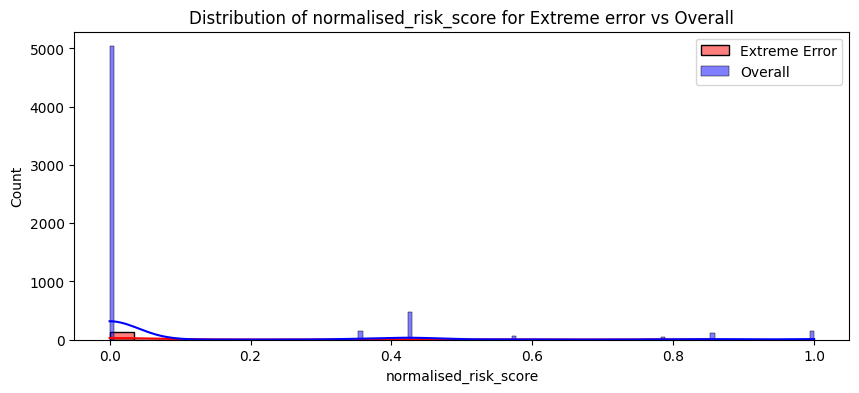

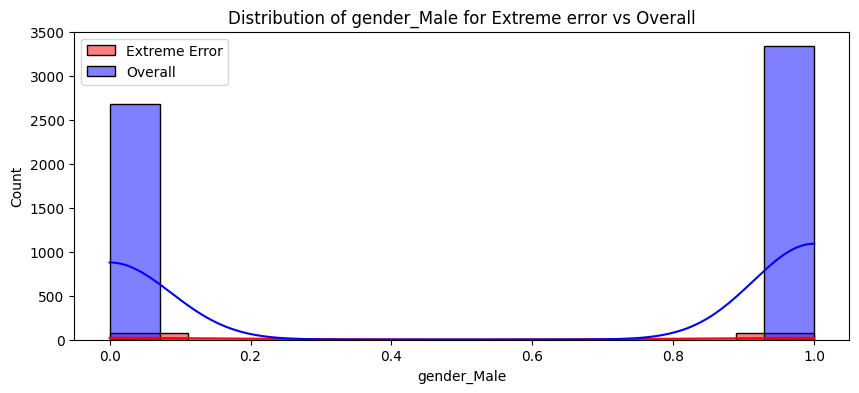

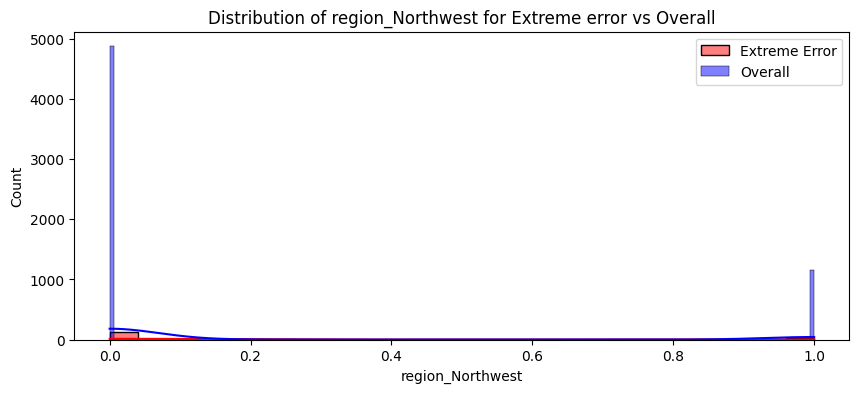

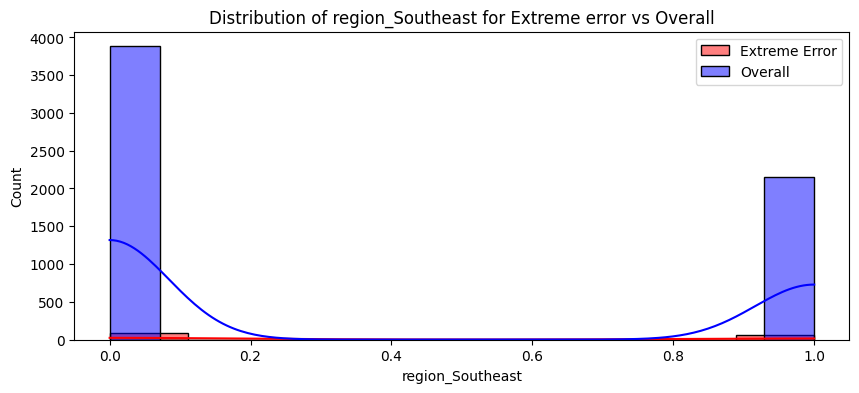

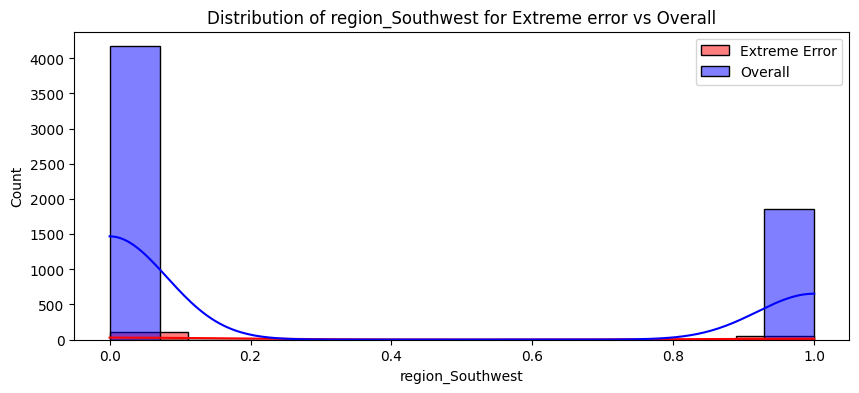

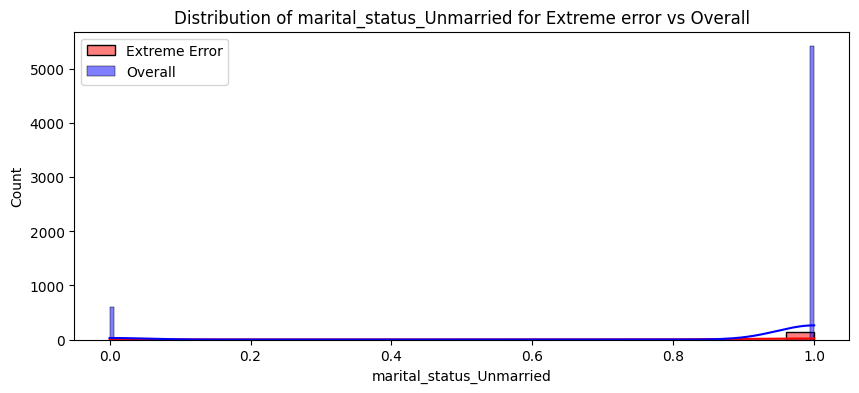

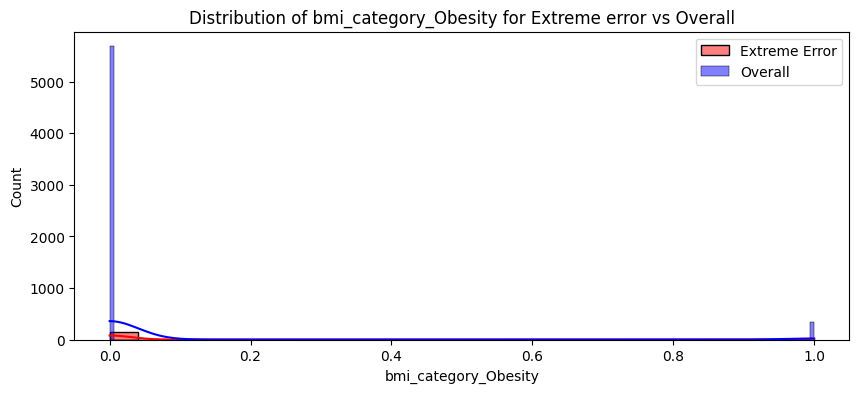

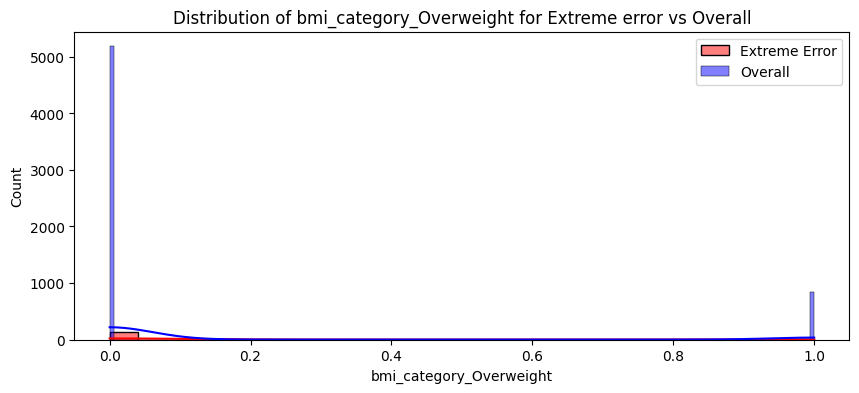

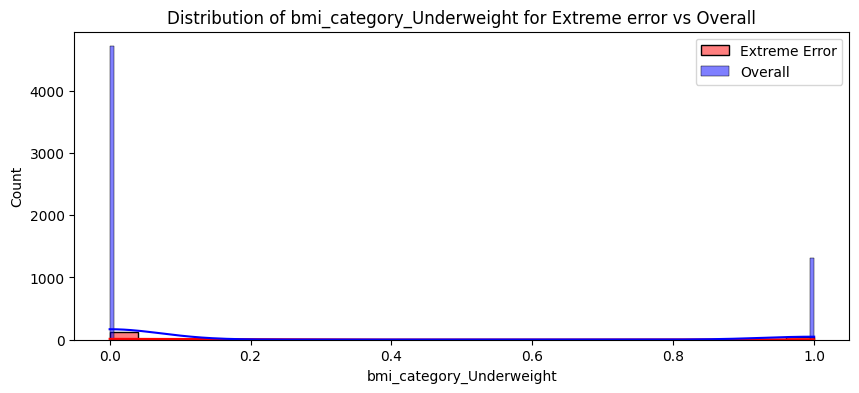

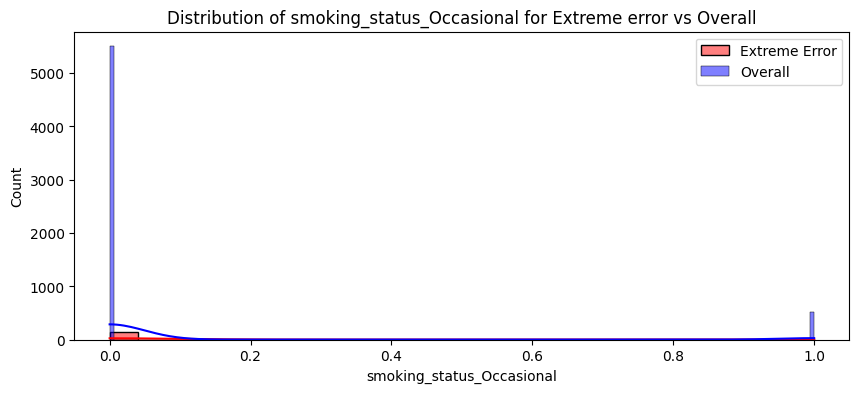

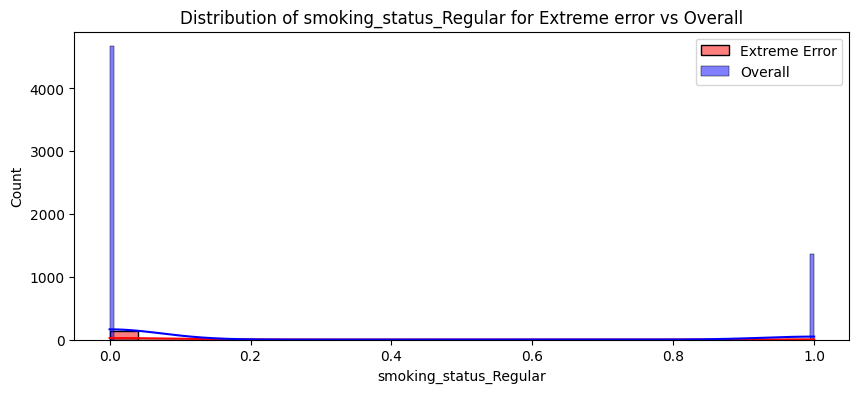

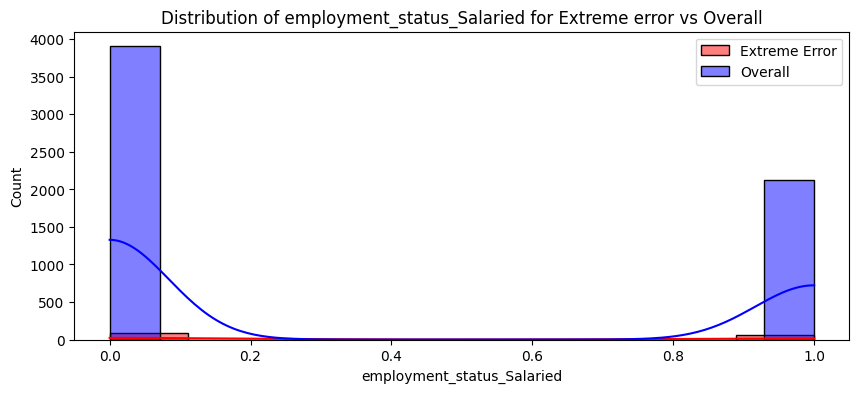

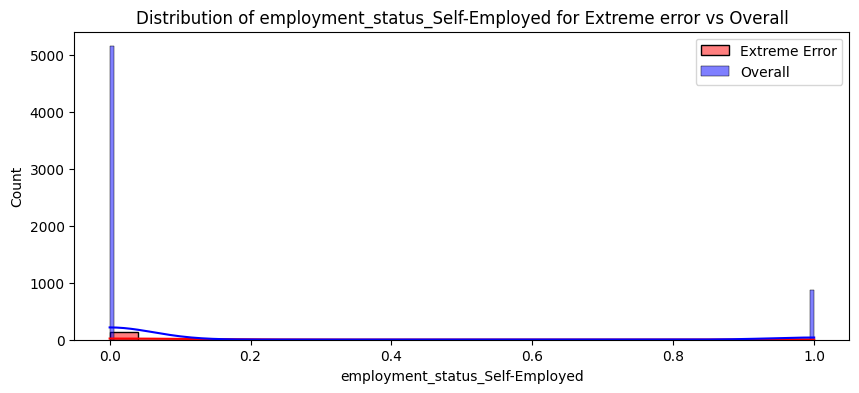

In [123]:
for x in x_test.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(extreme_error_df[x],color='red',label='Extreme Error',kde=True)
    sns.histplot(x_test[x],color='blue',label='Overall',alpha=0.5,kde=True)
    plt.legend()
    plt.title(f'Distribution of {x} for Extreme error vs Overall')
    plt.show()

here we saw that the kbe is differen in `age`

<Axes: xlabel='age', ylabel='Count'>

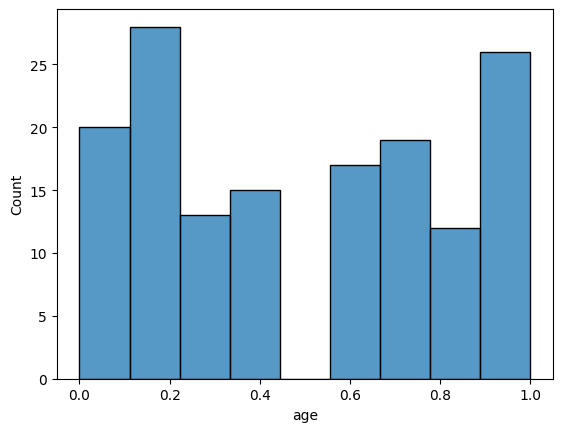

In [124]:
sns.histplot(extreme_error_df.age)

In [125]:
extreme_error_df['income_level'] =-1

In [126]:
df_reverse = pd.DataFrame()
df_reverse[col_to_scale] = scale.inverse_transform(extreme_error_df[col_to_scale])
df_reverse.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,18.0,0.0,-2.0,23.0,1.0,0.0
1,23.0,1.0,-2.0,2.0,1.0,0.0
2,25.0,0.0,-2.0,3.0,1.0,1.0
3,22.0,2.0,-2.0,8.0,1.0,0.0
4,24.0,3.0,-2.0,3.0,1.0,0.0


<Axes: xlabel='age', ylabel='Count'>

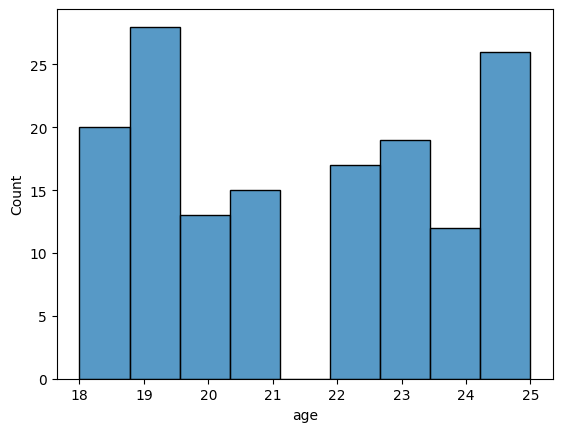

In [127]:
sns.histplot(df_reverse.age)

In [128]:
df_reverse.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
count,150.000000,150.000000,150.0,150.000000,150.0,150.000000
mean,21.440000,0.680000,-2.0,16.073333,1.0,0.226667
std,2.448065,0.914609,0.0,13.116973,0.0,0.450900
min,18.000000,0.000000,-2.0,1.000000,1.0,0.000000
25%,19.000000,0.000000,-2.0,6.000000,1.0,0.000000
50%,21.000000,0.000000,-2.0,12.000000,1.0,0.000000
75%,23.750000,1.000000,-2.0,25.000000,1.0,0.000000
max,25.000000,3.000000,-2.0,91.000000,1.0,2.000000


In [129]:
df_reverse['age'].quantile(0.95)

np.float64(25.0)

In [130]:
# Export Model

from joblib import dump

dump(best_model,"../artifacts/model_young.joblib")

['../artifacts/model_young.joblib']

In [131]:
scale_with_col = {
    'scale':scale,
    'col_to_scale':col_to_scale
}
dump(scale_with_col,'../artifacts/scaler_young.joblib')

['../artifacts/scaler_young.joblib']